# PRÁCTICA PYTHON AVANZADO

La siguiente práctica se divide en dos partes:

- Por un lado, la generación de hostnames mediante funciones y su posterior almacenamiento en un dataframe de pandas.

- Por otro lado, la elaboración de distintas visualizaciones a partir de estos datos.

## Librerías utilizadas

In [1]:
#1. Importar todas las librerías necesarias
import random 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Elaboración del dataset

### Funciones

Las funciones que utilizaremos son las siguientes:

In [2]:
#3. Crear una función para generar los hostnames en base a unas reglas
def set_hostnames(number_of_hosts: int)  -> None: #Lo que devuelve   # number_of_hosts: int ...Tipo de dato del parámetro 
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30    #Proporción de países
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1  #Proporción de sistemas operativos
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30  #Proporción de entornos
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)  #zfill: rellena con 0 por la izquierda hasta (x) dígitos
        hostnames.append(hostname)

#4. Crear una función para obtener el nombre del SO 
def get_os(hostname: str) -> str:
    os_dic = {'L': 'Linux', 'S': 'Solaris', 'A': 'AIX', 'H': 'HP-UX'}  #diccionario de sistemas operativos
    os = ''
    #Obtiene el caracter 0 del hostname y devuelve su significado
    if hostname.startswith('L'):
        os = os_dic.get('L')
    elif hostname.startswith('S'):
        os = os_dic.get('S')
    elif hostname.startswith('A'):
        os = os_dic.get('A')
    elif hostname.startswith('H'):
        os = os_dic.get('H')   
    else:
        os = 'Unknow'   
            
    return os

#5. Crear una función para obtener el nombre del entorno
def get_enviroment(hostname: str) -> str:
    en_dic = {'D': 'Development', 'I': 'Integration', 'T': 'Testing', 'S': 'Staging', 'P': 'Production'}
    en = ''
    #Obtiene el caracter 1 del hostname y devuelve su significado
    if hostname[1] == 'D':
        en = en_dic.get('D')
    elif hostname[1] == 'I':
        en = en_dic.get('I')
    elif hostname[1] == 'T':
        en = en_dic.get('T')
    elif hostname[1] == 'S':
        en = en_dic.get('S')   
    elif hostname[1] == 'P':
        en = en_dic.get('P')
    else:
        en = 'Unknow'   
            
    return en

#6. Creamos una función para obtener el nombre del país
def get_country(hostname: str) -> str:
    coun_dic = {'NOR': 'Norway', 'DEU': 'Germany', 'ITA': 'Italy', 'ESP': 'Spain', 'IRL': 'Ireland', 'FRA': 'France'}
    coun = ''
    #Obtiene de los caracteres 2 a 5 del hostname y devuelve su significado
    if hostname[2:5] == 'NOR':
        coun = coun_dic.get('NOR')
    elif hostname[2:5] == 'DEU':
        coun = coun_dic.get('DEU')
    elif hostname[2:5] == 'ITA':
        coun = coun_dic.get('ITA')
    elif hostname[2:5] == 'ESP':
        coun = coun_dic.get('ESP')
    elif hostname[2:5] == 'IRL':
        coun = coun_dic.get('IRL')
    elif hostname[2:5] == 'FRA':
        coun = coun_dic.get('FRA')
    else:
        coun = 'Unknow'
        
    return coun


#7. Crear una función para generar el DataFrame
def set_dataframe(count: int) -> None:
    global df #Invocamos a la variable como global
    set_hostnames(count)  #Generamos los hostnames
    for hostname in hostnames:       
        node = int(hostname[5:8])    
        os = get_os(hostname)
        en = get_enviroment(hostname)
        coun = get_country(hostname)
        host_dic = {'hostname': hostname, 'os': os, 'enviroment': en, 'country': coun, 'node': node}  #Cada key representa una columna del df
        dataset.append(host_dic)
    df = pd.DataFrame(dataset)

### Dataframe

A continuación, mediante las funciones creadas anteriormente, creamos el dataset y loa almacenamos en un csv:

In [6]:
#2. Inicializar algunas variables que después modificaremos
hostnames = [] 
dataset = []
df = None
count = 1500

  
#8. Crear el DataFrame
hosts_df = set_dataframe(count) 
#9. Guardar el DataFrame generado en un fichero CSV
df.to_csv('hosts.csv', header=True, index=False)
hosts_df=pd.read_csv('hosts.csv')       

## Visualizaciones

### Número de hosts por entorno agrupados por país

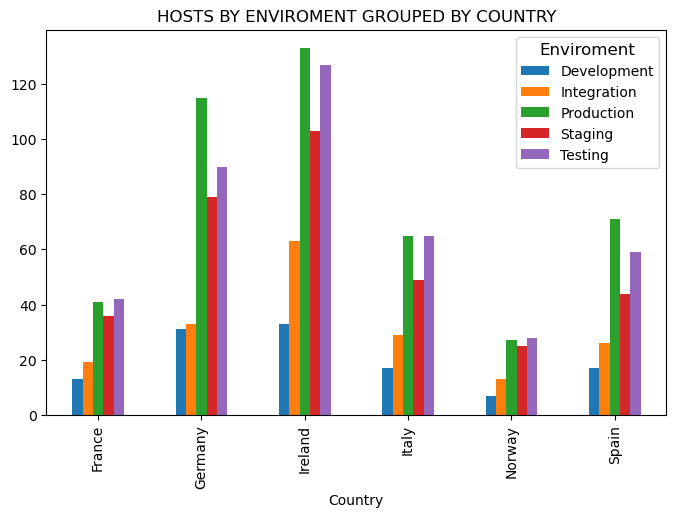

In [7]:
#10.Generar un único gráfico agrupando para cada país (country) los entornos (enviroment)

hosts_df.groupby(['country', 'enviroment']).size().unstack().plot(kind='bar', figsize=(8,5))  #Plot
plt.xlabel('Country')   #Etiqueta eje x
plt.title('HOSTS BY ENVIROMENT GROUPED BY COUNTRY')    #Título
plt.legend(title='Enviroment',loc='best',fontsize=10, title_fontsize=12)  #Leyenda
plt.show()

### Subplot 2x2

A continuación, se pide una figura con 4 gráficos en una malla de 2 filas y 2 columnas:

- Tipo de sistema operativo agrupado por países
- Total de sistemas operativos
- Número de hosts por país
- Hosts por país agrupados por enviroment

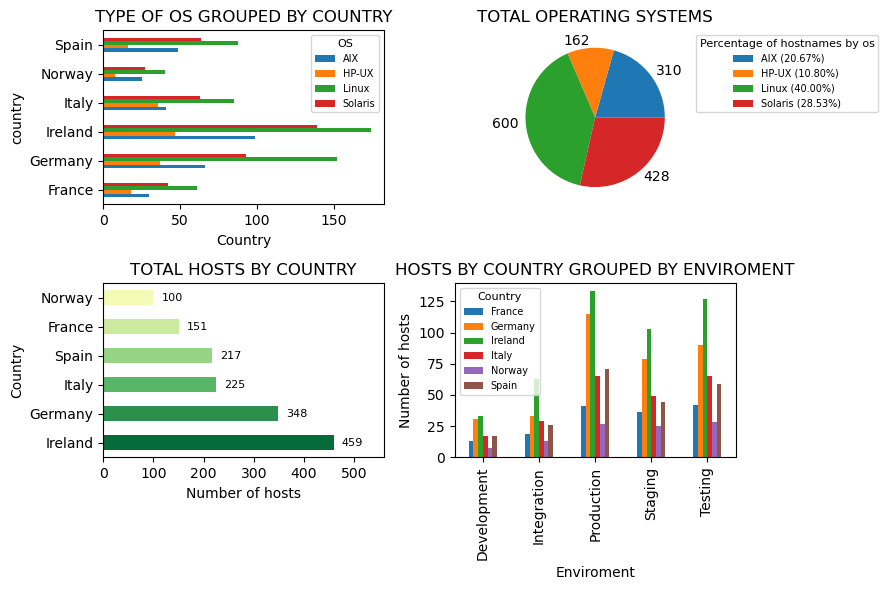

In [8]:
#11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas
fig, axs = plt.subplots(2,2, figsize=(9,6))  #Subplot 2x2

#11.1 Type of OS grouped by country
axs1 = hosts_df.groupby(['country', 'os']).size().unstack()
axs1.plot(kind='barh', ax=axs[0,0], xlabel='Country')   #kind: tipo de gráfico  ;   ax: localización en el subplot
axs[0, 0].set_title('TYPE OF OS GROUPED BY COUNTRY')
axs[0,0].legend(title='OS', loc='best', fontsize=7, title_fontsize=8)

#11.2 Total operating systems
pct_df = pd.DataFrame(df['os'].value_counts()).reset_index().sort_values('os')  #Creamos dataframe con la cantidad de hostnames por os y ordenamos por cantidad ascendentemente
pct_df = pct_df.reset_index().drop('level_0', axis=1)  #Reseteamos índice

pct = hosts_df['os'].value_counts()/count*100  #Generamos porcentajes de sistemas operativos en el dataset y los guardamos en variable
pct.sort_values(inplace = True)    #Los ordenamos por cantidad ascendentemente
pct = ['%.2f' % elem for elem in pct]   # Creamos una lista con estos valores (solo 2 decimales)

pct_df['pct'] = pct  #Creamos columna donde añadiremos la lista de porcentajes
pct_df['os+pct'] = pct_df['index'] + ' ' + '(' + pct_df['pct'] + '%)'  #Creamos columna donde concatenamos el nombre del os y su porcentaje
pct_df = pct_df.sort_values('index')  #ordenamos por os alfabéticamente

labels=pct_df['os+pct']   #variable utilizada posteriormente en etiqueta de la leyenda

axs2 = hosts_df.groupby(['os']).size()  #agrupamos los hostnames por sistema operativo
axs2.plot(kind='pie', ax=axs[0,1], labels=axs2, ylabel='')  #labels=axs2 : etiqueta = cantidad de hostnames por os
axs[0, 1].set_title('TOTAL OPERATING SYSTEMS')
axs[0,1].legend(bbox_to_anchor=(1.05,1), loc='upper left', title='Percentage of hostnames by os', labels = labels, fontsize=7, title_fontsize=8)

#11.3 Total hosts by country
axs3 = hosts_df['country'].value_counts()
color = sns.color_palette("YlGn_r")  #color de las barras del gráfico
p= axs3.plot(kind='barh', ax=axs[1,0], ylabel='Country', xlim=(0,max(axs3)+100), color=color)
axs[1,0].bar_label(p.containers[0], padding = 6, size = 8)
axs[1,0].set_xlabel('Number of hosts')
axs[1, 0].set_title('TOTAL HOSTS BY COUNTRY')

#11.4 Hosts by country grouped by enviroment
axs4 = hosts_df.groupby(['country','enviroment']).size().unstack(0)
axs4.plot(kind='bar', ax=axs[1,1], xlabel='Enviroment', ylabel='Number of hosts')
axs[1, 1].set_title('HOSTS BY COUNTRY GROUPED BY ENVIROMENT')
axs[1,1].legend(loc='upper left', title='Country', fontsize=7, title_fontsize=8)


fig.tight_layout()   #Ajustamos el subplot

